In [1]:
import statsmodels.api as sm
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pygal as pg
import math
import time
%matplotlib inline

In [2]:
EUROdat_initial =  pd.read_csv('Euro.csv')
EUROdat_initial['LogEuro'] = EUROdat_initial['EURO'].apply(math.log)
EUROdat_initial.set_index('DATE', inplace=True)
# insert time predictor variable, intergers 1 to end
EUROdat_initial.insert(2,'TIME',list(range(1,len(EUROdat_initial['EURO'])+1)))
#EUROdat_initial.insert(3,'DATE',EUROdat_initial.apply(time.strptime("%Y-%m-%d")))
EUROdat_initial

,EURO,LogEuro,TIME
DATE,,,
1999-01-04,1.1812,0.166531,1
1999-01-05,1.1760,0.162119,2
1999-01-06,1.1636,0.151519,3
1999-01-07,1.1672,0.154608,4
1999-01-08,1.1554,0.144447,5
1999-01-11,1.1534,0.142714,6
1999-01-12,1.1548,0.143927,7
1999-01-13,1.1698,0.156833,8
1999-01-14,1.1689,0.156063,9


In [5]:
# OLS regression 1 to 700

Y_var1 = EUROdat_initial.iloc[0:701,0]
X_var1 = EUROdat_initial.iloc[0:701,2]
# add constant manually (as separate step) in statsmodels. Why???
X_var1 = sm.add_constant(X_var1)
model1 = sm.OLS(Y_var1,X_var1)
results_1to700 = model1.fit()
print(results_1to700.summary())

                            OLS Regression Results                            
Dep. Variable:                   EURO   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     2924.
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          6.21e-252
Time:                        09:48:31   Log-Likelihood:                 1307.6
No. Observations:                 701   AIC:                            -2611.
Df Residuals:                     699   BIC:                            -2602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0995      0.003    387.523      0.0

In [6]:
# OLS regression 701 to 4772

Y_var2 = EUROdat_initial.iloc[701:4772,0]
X_var2 = EUROdat_initial.iloc[701:4772,2]
# add constant manually (as separate step) in statsmodels. Why???
X_var2 = sm.add_constant(X_var2)
model2 = sm.OLS(Y_var2,X_var2)
results_701on = model2.fit()
print(results_701on.summary())

                            OLS Regression Results                            
Dep. Variable:                   EURO   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     64.88
Date:                Mon, 19 Feb 2018   Prob (F-statistic):           1.04e-15
Time:                        09:49:15   Log-Likelihood:                 2021.5
No. Observations:                4071   AIC:                            -4039.
Df Residuals:                    4069   BIC:                            -4026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2065      0.006    206.189      0.0

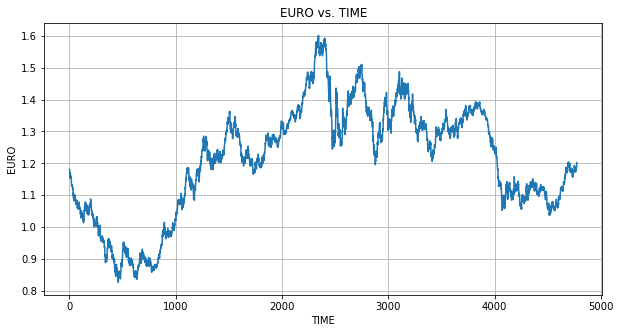

In [27]:
#plot of EURO vs time 

fig, EURO_plot = plt.subplots(figsize=(10,5))
EURO_plot.set_title('EURO vs. TIME')
EURO_plot.set_xlabel('TIME')
EURO_plot.set_ylabel('EURO')
#resid_plot.plot(EUROdat_initial['EURO'], np.zeros((283,)), color='r', linestyle='-', linewidth=1)
EURO_plot.plot(EUROdat_initial['TIME'],EUROdat_initial['EURO'], '-', mfc='orange')
EURO_plot.grid()

In [39]:
pred_fit = results_1to700.predict([1,4773])
target_SE = results_1to700.bse['TIME'] + results_1to700.bse['const']

print('Forecast EURO, 12/29/2017:\nPoint Forecast: %.5f; 95pct CI: %.5f, %.5f.' %(pred_fit, pred_fit - 2*target_SE, pred_fit + 2*target_SE)) 

pred_fit2 = results_701on.predict([1,4773])
target_SE2 = results_701on.bse['TIME'] + results_701on.bse['const']

print('Forecast EURO, 12/29/2017:\nPoint Forecast: %.5f; 95pct CI: %.5f, %.5f.' %(pred_fit2, pred_fit2 - 2*target_SE2, pred_fit2 + 2*target_SE2)) 

Forecast EURO, 12/29/2017:
Point Forecast: -0.70781; 95pct CI: -0.71350, -0.70212.
Forecast EURO, 12/29/2017:
Point Forecast: 1.28204; 95pct CI: 1.27033, 1.29375.
